In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
dir_path = '/Users/daria/Desktop/2023-24b-fai1-adsai-dariavladutu236578/DataLabPrep/NAC_data_2022_2023/data'

Write a Python script that parses through all the folders of the directory, and reads the file

In [4]:
for file in os.listdir(dir_path):
    print(file)

Italy Serie C 2022_2023 (3).xlsx
Greece Super League 2022_2023.xlsx
Hungary NB I 2022_2023.xlsx
Italy Serie B 2022_2023.xlsx
Italy Serie C 2022_2023 (1).xlsx
Norway OBOS Ligaen 2023.xlsx
Czech Fortuna Liga 2022_2023.xlsx
Germany 2. Bundesliga 2022_2023.xlsx
Germany Regionalliga 2022_2023.xlsx
Slovakia Nike Liga 2022_2023.xlsx
Portugal 3rd Liga 2022_2023.xlsx
Portugal 2nd Liga 2022_2023.xlsx
Sweden Allvenskan 2023.xlsx
Italy Serie C 2022_2023 (2).xlsx
Poland Ekstraklasa 2022_2023.xlsx
Spain Primera Division RFEF 2022_2023.xlsx
Estonia 1. Division 2023.xlsx
Czech FNL 2nd division 2022_2023.xlsx
Israel 2022_2023.xlsx
Lithuania 1. Division 2023.xlsx
Germany 3. Liga 2022_2023.xlsx
Belgium First Division B 2022_2023.xlsx
Ireland Premier Division 2023.xlsx
France National 1 2022_2023.xlsx
Cyprus 1. Division 2022_2023.xlsx
Denmark Superliga 2022_2023.xlsx
Romania Superliga 2022_2023.xlsx
Eredivisie 2022_2023.xlsx
Italy Primavera 2022_2023.xlsx
Belgium First Division A 2022_2023.xlsx
Austria 2.

Store all of the data present in multiple folders into a single pandas dataframe

In [6]:
# List to store DataFrames read from Excel files
NAC_datas = []

# Walk through the directory and its subdirectories
for root, dirs, files in os.walk(dir_path):

    for file in files:
        # Construct the full file path
        file_path = os.path.join(root, file)

        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(file_path)

        # Append the DataFrame to the list
        NAC_datas.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
NAC_data = pd.concat(NAC_datas, ignore_index=True)
print(NAC_data)


               Player                   Team Team within selected timeframe  \
0         P. Iemmello              Catanzaro                      Catanzaro   
1      J. Petriccione                Crotone                        Crotone   
2           T. Biasci              Catanzaro                      Catanzaro   
3       E. Volpicelli       Sangiuliano City               Sangiuliano City   
4           A. Curcio              Catanzaro                      Catanzaro   
...               ...                    ...                            ...   
16530    C. Nguyen Do           Slavia Sofia                   Slavia Sofia   
16531     K. Stoyanov           Slavia Sofia                   Slavia Sofia   
16532    B. Bozhurkin             Hebar 1918                     Hebar 1918   
16533       M. Petkov  Ceahlăul Piatra Neamţ           Lokomotiv Sofia 1929   
16534     I. Mihaylov        Septemvri Sofia                     Hebar 1918   

              Position   Age  Market value Contract

In [9]:
# Save the data as a csv file
NAC_data.to_csv('NAC_data.csv')

### Questions

1. How many numerical variables are present?
2.  How many categorical variables are present?

In [7]:
# Initialize a counter for numerical values
numerical_values = 0

# Initialize a counter for categorical values
categorical_values = 0

# Iterate through columns in the NAC_data DataFrame
for column in NAC_data.columns:

    # Check if the data type of the column is numeric
    if pd.api.types.is_numeric_dtype(NAC_data[column]):

        # Increment the numerical_values counter
        numerical_values += 1

    # If the data type is not numerical, it will be categorical 
    else:

        # Increment the categorical_values counter
        categorical_values += 1

print(f' The NAC dataset has {numerical_values} numerical values')
print(f' The NAC dataset has {categorical_values} categorical values')

 The NAC dataset has 105 numerical values
 The NAC dataset has 9 categorical values


3. Are there any missing values present in any of the columns of data? If so, how will you handle the missing values?

In [13]:
# Check if there are any missing values in the entire dataset

if NAC_data.isna().any().any():
    print('There are missing values in the dataset')
else:
    print("There are no missing values in the dataset")

There are missing values in the dataset


<Axes: >

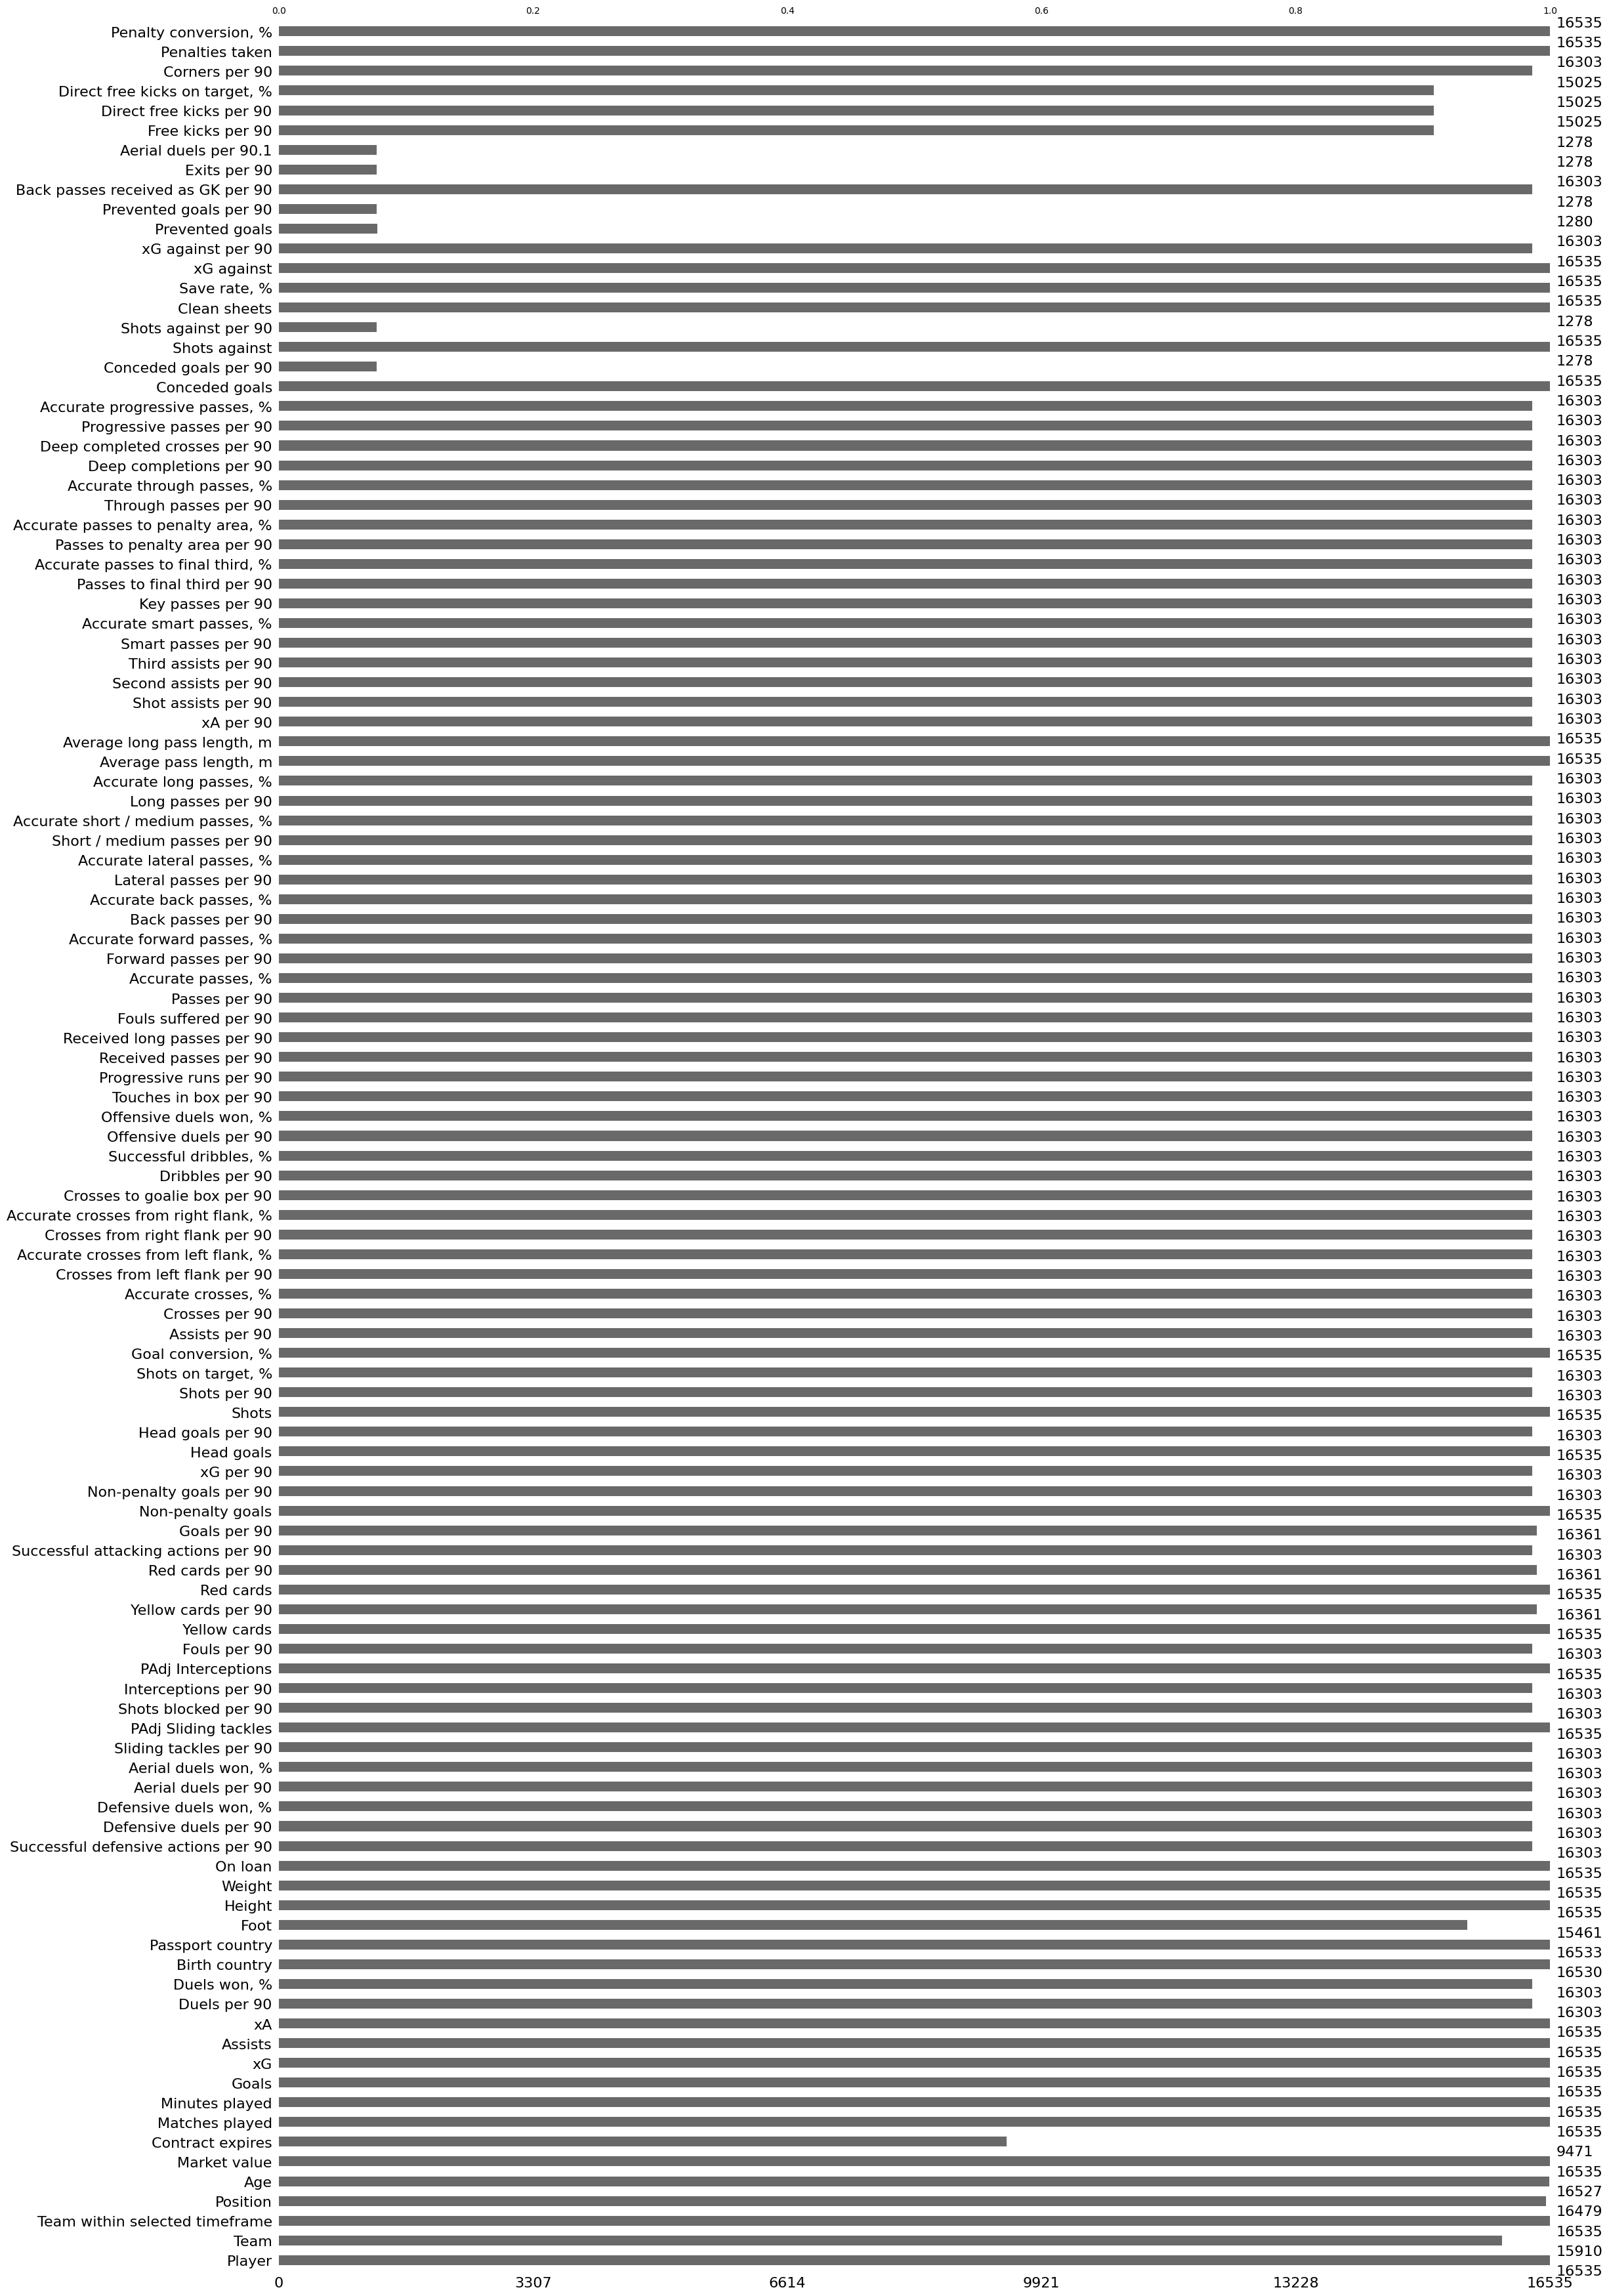

In [7]:
# Program to visualize missing values in dataset 
  
# Importing the libraries 
import pandas as pd 
import missingno as msno 
  
# Visualize the number of missing 
# values as a bar chart 
msno.bar(NAC_data) 

In [5]:
# Create a copy of the original DataFrame for cleaning
clean_NAC_data = NAC_data

# Drop rows where 'Passport country', 'Birth country', 'Age', or 'Position' has missing values
clean_NAC_data = clean_NAC_data.dropna(subset='Passport country')
clean_NAC_data = clean_NAC_data.dropna(subset='Birth country')
clean_NAC_data = clean_NAC_data.dropna(subset='Age')
clean_NAC_data = clean_NAC_data.dropna(subset='Position')

# Drop the 'Contract expires' column
clean_NAC_data = clean_NAC_data.drop(['Contract expires'], axis='columns')

# Fill missing values in the 'Foot' column with 'No preference'
clean_NAC_data['Foot'] = clean_NAC_data['Foot'].fillna('No preference')

# Fill missing values in the 'Team' column with 'Free Agent'
clean_NAC_data['Team'] = clean_NAC_data['Team'].fillna('Free Agent')

# Fill missing values in the 'Position' column with 'Unknown'
clean_NAC_data['Position'] = clean_NAC_data['Position'].fillna('Unknown')

# Fill remaining missing values with 0
clean_NAC_data = clean_NAC_data.fillna(0)

<Axes: >

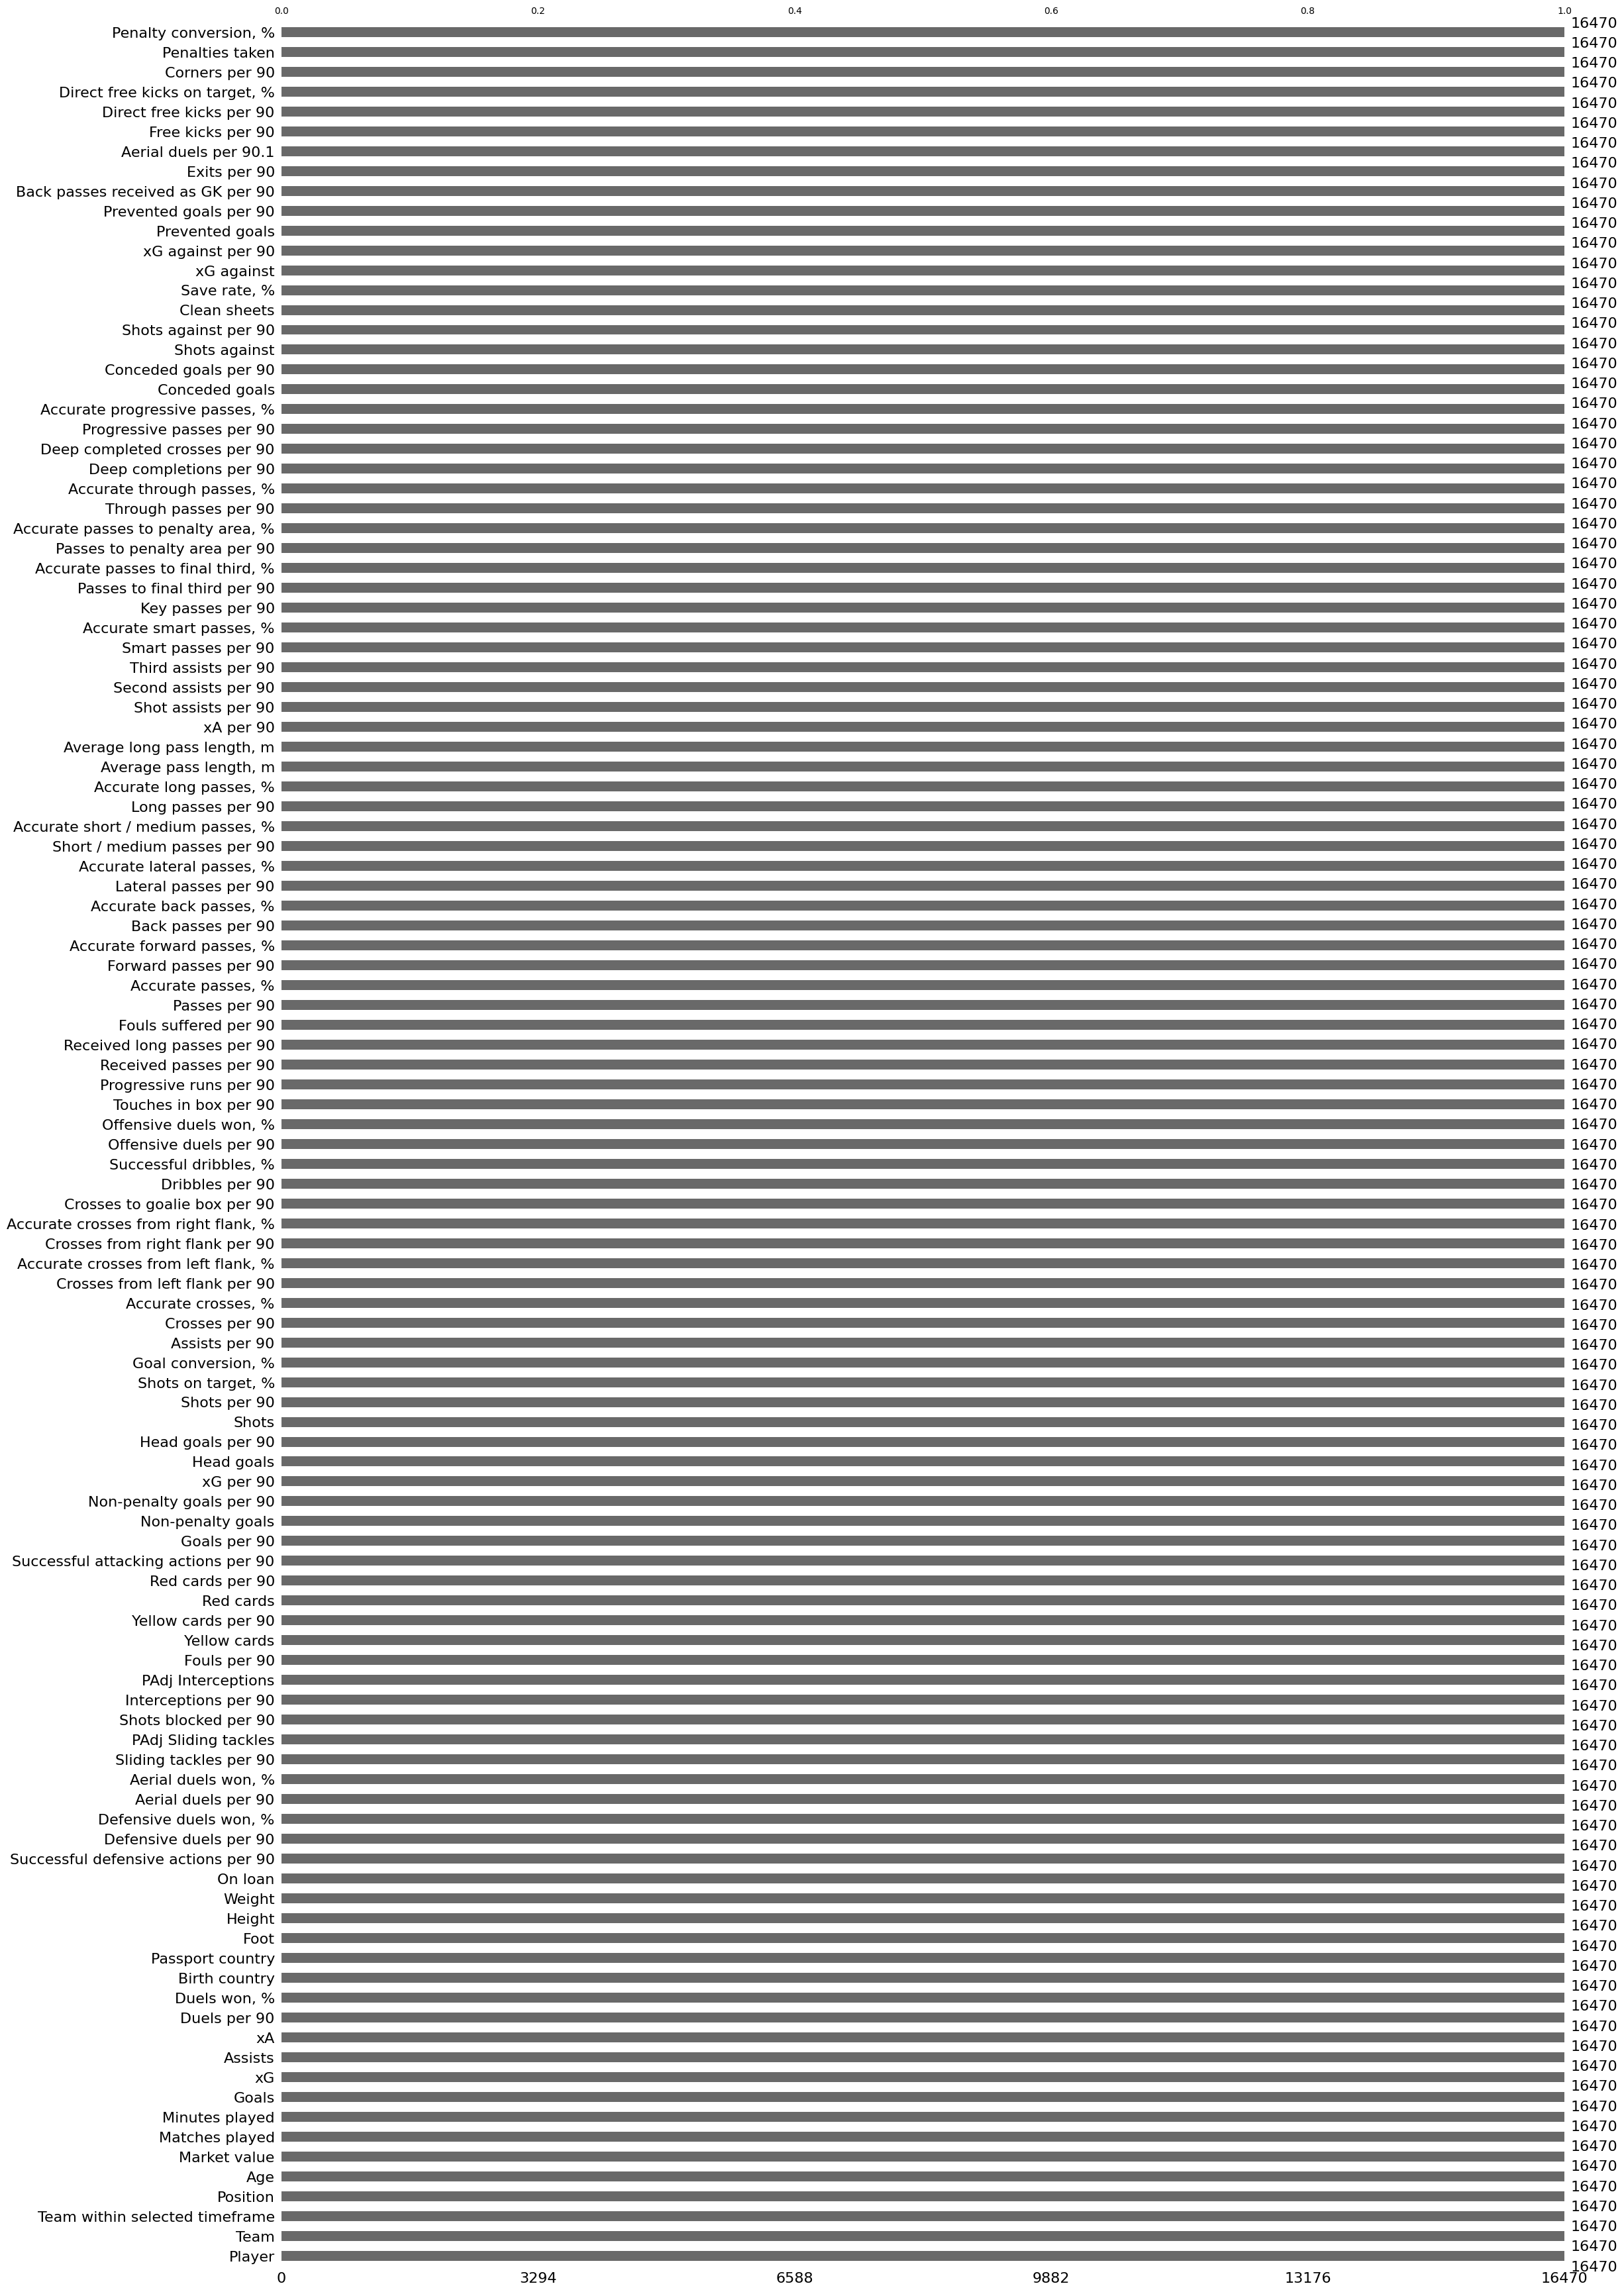

In [8]:
# Plot the bar chart
msno.bar(clean_NAC_data)

4. Are there any duplicate rows present in the dataset? If so, how did you handle it?

In [26]:
# Drop duplicate rows based on the specified columns ('Player', 'Age', 'Team')
clean_NAC_data = clean_NAC_data.drop_duplicates(subset = ['Player', 'Age', 'Team'])

5. Is each column in the dataset stored in the appropriate numeric format?

In [28]:
# Iterate through columns in the clean_NAC_data DataFrame
for column in clean_NAC_data.columns:

    # Get the data type of the column
    data_format = clean_NAC_data[column].dtype
    
    print(f'{column}:{data_format}')

Player:object
Team:object
Team within selected timeframe:object
Position:object
Age:float64
Market value:int64
Matches played:int64
Minutes played:int64
Goals:int64
xG:float64
Assists:int64
xA:float64
Duels per 90:float64
Duels won, %:float64
Birth country:object
Passport country:object
Foot:object
Height:int64
Weight:int64
On loan:object
Successful defensive actions per 90:float64
Defensive duels per 90:float64
Defensive duels won, %:float64
Aerial duels per 90:float64
Aerial duels won, %:float64
Sliding tackles per 90:float64
PAdj Sliding tackles:float64
Shots blocked per 90:float64
Interceptions per 90:float64
PAdj Interceptions:float64
Fouls per 90:float64
Yellow cards:int64
Yellow cards per 90:float64
Red cards:int64
Red cards per 90:float64
Successful attacking actions per 90:float64
Goals per 90:float64
Non-penalty goals:int64
Non-penalty goals per 90:float64
xG per 90:float64
Head goals:int64
Head goals per 90:float64
Shots:int64
Shots per 90:float64
Shots on target, %:float64


In [ ]:
#Some of the data is not stored in the appropriate data format (e.g., Age, which is supposed to be stored as int)

6. What is the range of Market Value of the players?

In [29]:
# Calculate the minimum and maximum market values
min_market_val = clean_NAC_data['Market value'].min()
max_market_val = clean_NAC_data['Market value'].max()
print(f'Range of market value of the players is {(min_market_val, max_market_val)}')

Range of market value of the players is (0, 60000000)


7. Identify the country of the youngest player in the dataset

In [30]:
# Find the minimum age to identify the youngest player
youngest_player_age = clean_NAC_data['Age'].min()

# Filter the DataFrame to get information about the youngest player
youngest_player_info = clean_NAC_data[clean_NAC_data['Age'] == youngest_player_age]

# Extract the country of the youngest player
country_of_youngest_player = youngest_player_info['Birth country'].values[0]
print(f"The country of the youngest player is: {country_of_youngest_player}")

The country of the youngest player is: Estonia
